In [103]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
X = np.array([
    [1, 1, 0, 0, 1, 1],
    [1, 1, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 1],
])

In [12]:
def sokal(x1, x2):
    if len(x1) != len(x2):
        raise Exception("Vectors must be of equal length")
    ad = 0
    m = len(x1)
    for i in range(0, m):
        if x1[i] == x2[i]:
            ad += 1
    return ad / m

In [73]:
def jaccard(x1, x2):
    if len(x1) != len(x2):
        raise Exception("Vectors must be of equal length")
    bc = 0
    a = 0
    m = len(x1)
    for i in range(0, m):
        if x1[i] != x2[i]:
            bc += 1
        if x1[i] == 1 & x1[i] == x2[i] & x2[i]==1:
            a += 1
    return a / (a + bc)

In [38]:
def simil_matrix(X, simil="sokal"):
    s = sokal if simil == "sokal" else jaccard
    n = X.shape[0]
    S = np.zeros((n,n))
    for i in range(0, n):
        for j in range (0, n):
            S[i][j] = s(X[i], X[j])
    return S

In [74]:
S_sokal = simil_matrix(X)
S_sokal

array([[1.        , 0.66666667, 0.5       , 0.5       , 0.66666667],
       [0.66666667, 1.        , 0.5       , 0.5       , 0.33333333],
       [0.5       , 0.5       , 1.        , 1.        , 0.83333333],
       [0.5       , 0.5       , 1.        , 1.        , 0.83333333],
       [0.66666667, 0.33333333, 0.83333333, 0.83333333, 1.        ]])

In [75]:
S_jaccard = simil_matrix(X, 'jaccard')
S_jaccard

array([[1.        , 0.6       , 0.4       , 0.4       , 0.6       ],
       [0.6       , 1.        , 0.4       , 0.4       , 0.33333333],
       [0.4       , 0.4       , 1.        , 1.        , 0.75      ],
       [0.4       , 0.4       , 1.        , 1.        , 0.75      ],
       [0.6       , 0.33333333, 0.75      , 0.75      , 1.        ]])

In [106]:
def distance_matrix(S):
    D2 = 2 * np.ones((S.shape[0], S.shape[0]))
    D2 = D2 - 2 * S
    return D2

In [107]:
D2 = distance_matrix(S_sokal)
D2

array([[0.        , 0.66666667, 1.        , 1.        , 0.66666667],
       [0.66666667, 0.        , 1.        , 1.        , 1.33333333],
       [1.        , 1.        , 0.        , 0.        , 0.33333333],
       [1.        , 1.        , 0.        , 0.        , 0.33333333],
       [0.66666667, 1.33333333, 0.33333333, 0.33333333, 0.        ]])

In [108]:
distance_matrix(S_jaccard)

array([[0.        , 0.8       , 1.2       , 1.2       , 0.8       ],
       [0.8       , 0.        , 1.2       , 1.2       , 1.33333333],
       [1.2       , 1.2       , 0.        , 0.        , 0.5       ],
       [1.2       , 1.2       , 0.        , 0.        , 0.5       ],
       [0.8       , 1.33333333, 0.5       , 0.5       , 0.        ]])

In [99]:
D2_stand = StandardScaler().fit_transform(D2)
covariance = np.cov(D2_stand)
eig_values, eig_vectors  =la.eig(covariance)
eig_values.round(2)

array([ 4.48,  1.3 ,  0.03,  0.  , -0.  ])

In [94]:
eig_vectors.round(2)

array([[-0.5 , -0.58, -0.47, -0.44, -0.05],
       [-0.59,  0.57,  0.36, -0.44, -0.05],
       [ 0.39,  0.24, -0.29, -0.35,  0.65],
       [ 0.39,  0.24, -0.29, -0.53, -0.76],
       [ 0.3 , -0.48,  0.69, -0.44, -0.05]])

In [95]:
eig_values[0]/eig_values.sum(), eig_values[1]/eig_values.sum(), eig_values[2]/eig_values.sum()

(0.7717457629062912, 0.223593598105929, 0.0046606389877797555)

In [100]:
eig_values[0]/eig_values.sum() + eig_values[1]/eig_values.sum() + eig_values[2]/eig_values.sum()

0.9999999999999999

In [102]:
new_df = []
for index, row in enumerate(D2_stand):
    new_df.append([np.dot(eig_vectors[:,0], row), np.dot(eig_vectors[:,1], row),])
new_df = pd.DataFrame(np.array(new_df), columns="Z1 Z2".split())
new_df.tail()

,Z1,Z2
0,2.104403,1.318451
1,2.509368,-1.273840
2,-1.663734,-0.566450
3,-1.663734,-0.566450
4,-1.286304,1.088288


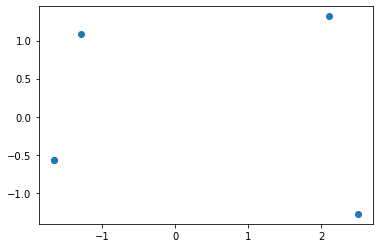

In [105]:
plt.plot(new_df.Z1, new_df.Z2, 'o')
plt.show()

## Regularización